## Exploratory Data analysis on the dog-app project

This notebook is meant to provide some insights for the exploratory data analysis for the images provided in the project. It's not part of the main analysis process. 

In [14]:
from glob import glob
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# A function to get image set data 
# Since all the dog image file is in breed_0****.jpg, we can get the 

def get_info(path):
    '''
    input - filepath containing images
    output - description of the files
    '''
    # Regex would be a better solution here but the method here will suffice
    filenames = [os.path.basename(s) for s in glob(path + '/*/*.jpg')]
    breed = [s.split('0')[0][:-1] for s in filenames]
    return breed

In [3]:
# get breed count
train_breed = get_info('./data/dog_images/train')
test_breed = get_info('./data/dog_images/test')
valid_breed = get_info('./data/dog_images/valid')

In [4]:
print('{} images in training set \n {} images in test set \n {} images in validation set'.format(len(train_breed), len(test_breed), len(valid_breed)))

6680 images in training set 
 836 images in test set 
 835 images in validation set


In [5]:
print(' {} breeds in train set \n {} breeds in test set \n {} images in validation set'.format(np.unique(train_breed).size, np.unique(test_breed).size,
    np.unique(valid_breed).size))

 133 breeds in train set 
 133 breeds in test set 
 133 images in validation set


In [6]:
# Make sure the unique set are in the right order
# If all sequences are the same, the np.sum should add to 133

np.sum(np.unique(test_breed) == np.unique(train_breed))
np.sum(np.unique(train_breed) == np.unique(valid_breed))

133

In [7]:
## Breed count in each set to calculate breed distribution 
df = pd.DataFrame()
df.index = np.unique(train_breed)
breed_count_train = np.unique(train_breed, return_counts=True)
breed_count_valid = np.unique(valid_breed, return_counts=True)
breed_count_test = np.unique(test_breed, return_counts=True)
df['Train'] = breed_count_train[1]/len(train_breed)*100
df['Valid'] = breed_count_valid[1]/len(valid_breed)*100
df['Test'] = breed_count_test[1]/len(test_breed)*100

In [8]:
# to Generate a plot
#df.plot(kind='barh', figsize=(15, 266), legend=True, title='% Breed in each image set')

In [9]:
# get human data

human_images = glob('./data/lfw/*/*.jpg')
len(human_images)

13233

In [10]:
# Create a imagenet with first 100 human files and dog files

dog_images = glob('./data/dog_images/*/*/*.jpg')

In [11]:
# Create a imagenet of 125 dogs and 125 humans
np.random.shuffle(human_images)
np.random.shuffle(dog_images)
a = human_images[:10]
b = dog_images[:10]
c = a + b



TypeError: Image data of dtype <U49 cannot be converted to float

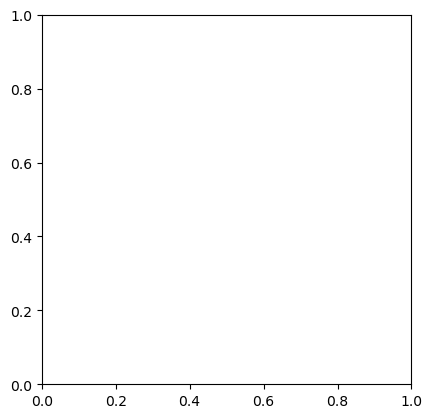

In [16]:
plt.imshow(a[0])

TypeError: Image data of dtype <U49 cannot be converted to float

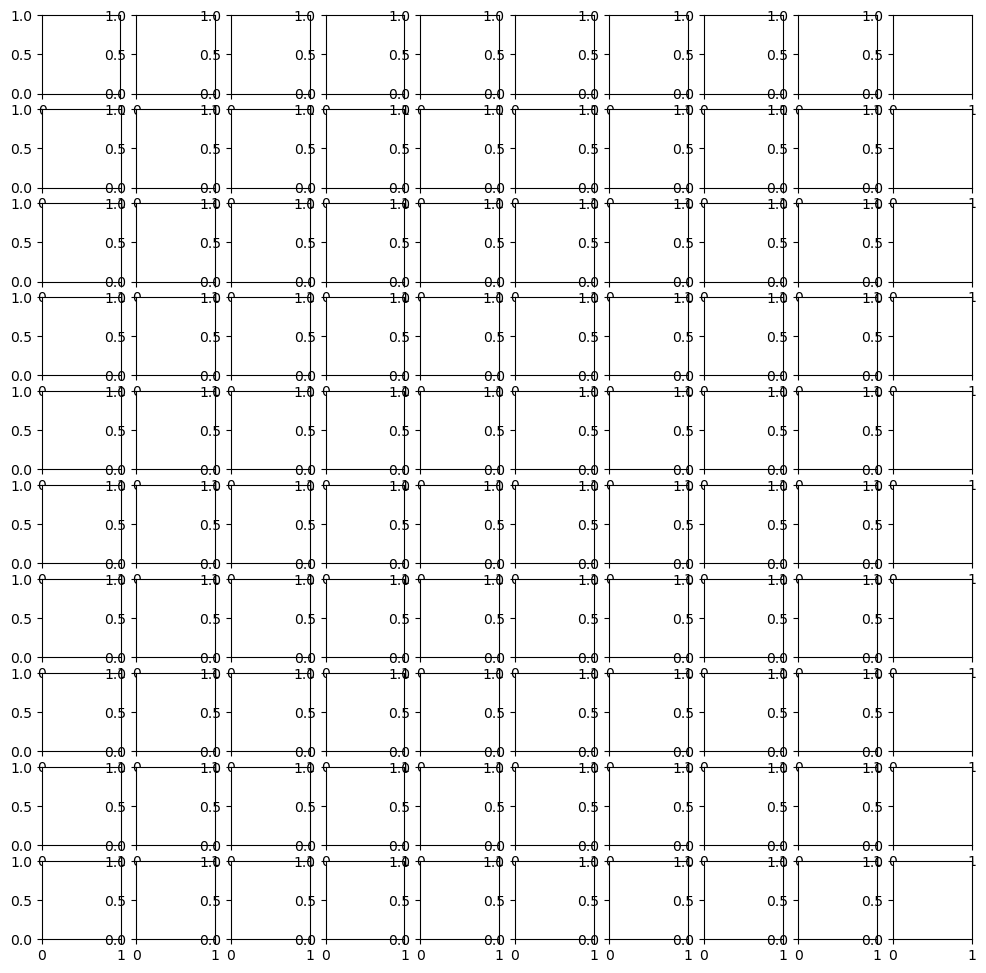

In [12]:
_, axs = plt.subplots(10, 10, figsize=(12, 12))
axs = axs.flatten()
for img, ax in zip(c, axs):
    ax.imshow(img)
plt.show()
